# MLP Lesion Test

In [1]:
import os
import sys
sys.path.append('..')
from IPython import display
from tqdm import tqdm
import seaborn as sns
import pandas as pd
import warnings
from src.utils import suppress, all_logging_disabled
from src.lesion import (perform_lesion_experiment, do_lesion_hypo_tests,
                        plot_all_damaged_clusters, compute_damaged_cluster_stats,
                        plot_overall_damaged_clusters)
from src.pointers import DATA_PATHS
from src.experiment_tagging import get_model_path

sns.set(style='whitegrid')

Using TensorFlow backend.


In [2]:
MODELS = [('mnist', 'MNIST'),
          ('cifar10', 'CIFAR10'),
          ('fashion', 'FASHION'),
          ('mnist', 'MNIST+DROPOUT'),
          ('cifar10', 'CIFAR10+DROPOUT'),
          ('fashion', 'FASHION+DROPOUT'),
          ('mnist', 'MNIST+L1REG'),
          ('cifar10', 'CIFAR10+L1REG'),
          ('fashion', 'FASHION+L1REG')]

n_clust = 12
n_shuffles = 20
n_workers = 10

 11%|█         | 1/9 [27:49<3:42:37, 1669.71s/it]

MNIST
Mean percentiles: [0.04761905 0.04761905 0.04761905 0.04761905 0.33333333 0.23809524
 0.66666667 0.23809524 0.23809524 0.42857143 0.19047619 0.23809524
 0.04761905 0.04761905 0.04761905 0.33333333 0.85714286 0.52380952
 0.42857143 0.19047619 0.04761905 0.0952381  0.04761905 0.04761905
 0.04761905 0.04761905 0.04761905 0.04761905]
Std percentiles: [0.42857143 0.28571429 0.14285714 0.61904762 0.33333333 0.57142857
 0.19047619 0.85714286 0.9047619  0.80952381 0.9047619  0.71428571
 0.38095238 0.95238095 0.76190476 0.19047619 0.61904762 0.04761905
 0.04761905 0.33333333 1.         0.85714286 1.         1.
 1.         1.         1.         0.61904762]
chi2 mean p: 1.362689732842532e-20
chi2 std p: 1.362689732842532e-20
combined mean p: 3.4369461135156194e-09
combined std p: 0.8425660339589442



 22%|██▏       | 2/9 [52:23<3:07:57, 1611.05s/it]

CIFAR10
Mean percentiles: [0.04761905 0.57142857 0.28571429 0.38095238 0.76190476 0.80952381
 0.95238095 1.         1.         0.57142857 0.61904762 0.04761905
 0.57142857 0.85714286 0.23809524 0.0952381  0.71428571 0.28571429
 0.95238095 0.04761905 0.04761905 0.04761905 0.04761905 0.04761905
 0.04761905 0.04761905]
Std percentiles: [0.04761905 0.04761905 0.04761905 0.04761905 0.04761905 0.04761905
 0.04761905 0.04761905 0.04761905 0.04761905 0.04761905 0.23809524
 0.38095238 0.95238095 0.71428571 0.95238095 0.23809524 0.71428571
 0.28571429 1.         0.9047619  1.         1.         1.
 1.         0.9047619 ]
chi2 mean p: 2.5600368105829848e-06
chi2 std p: 2.5600368105829848e-06
combined mean p: 0.0007879100426437602
combined std p: 0.00021561277419847923



 33%|███▎      | 3/9 [1:08:22<2:21:31, 1415.19s/it]

FASHION
Mean percentiles: [0.85714286 0.19047619 0.04761905 0.04761905 0.85714286 0.9047619
 0.42857143 0.80952381 0.0952381  0.14285714 0.28571429 0.14285714
 0.61904762 0.23809524 0.04761905 0.04761905 0.80952381 0.04761905
 0.66666667 0.04761905 0.04761905 0.04761905 0.04761905 0.04761905
 0.04761905 0.04761905]
Std percentiles: [0.04761905 0.33333333 0.38095238 0.14285714 0.04761905 0.04761905
 0.71428571 0.80952381 0.76190476 0.66666667 0.66666667 0.76190476
 0.04761905 0.47619048 0.71428571 0.95238095 0.0952381  0.9047619
 0.47619048 1.         1.         1.         1.         1.
 1.         0.95238095]
chi2 mean p: 8.638069702470476e-14
chi2 std p: 8.638069702470476e-14
combined mean p: 4.189156634416529e-07
combined std p: 0.4430452216442321



 44%|████▍     | 4/9 [1:36:41<2:05:02, 1500.52s/it]

MNIST+DROPOUT
Mean percentiles: [0.04761905 0.04761905 0.04761905 0.04761905 0.04761905 0.04761905
 0.04761905 1.         0.23809524 0.23809524 0.04761905 0.04761905
 0.04761905 0.04761905 0.95238095 0.04761905 0.14285714 0.76190476
 0.04761905 0.66666667 0.47619048 0.23809524 0.61904762 0.04761905
 0.04761905 0.23809524 0.38095238 0.04761905]
Std percentiles: [0.76190476 0.95238095 1.         0.80952381 0.95238095 1.
 0.76190476 0.95238095 0.47619048 0.33333333 0.9047619  0.85714286
 0.85714286 0.52380952 0.42857143 0.85714286 0.38095238 0.38095238
 0.61904762 0.04761905 0.04761905 1.         0.23809524 0.95238095
 0.9047619  0.23809524 0.52380952 0.52380952]
chi2 mean p: 3.939792473367494e-28
chi2 std p: 3.939792473367494e-28
combined mean p: 1.7312361961169927e-09
combined std p: 0.9448858361376433



 56%|█████▌    | 5/9 [1:53:18<1:29:57, 1349.45s/it]

CIFAR10+DROPOUT
Mean percentiles: [1.         0.04761905 0.80952381 0.52380952 0.04761905 0.95238095
 0.23809524 0.04761905 0.23809524 0.71428571 0.47619048 0.9047619
 0.76190476 0.33333333 0.61904762 0.04761905 0.38095238 0.04761905
 0.80952381 0.04761905 0.14285714 0.19047619 0.28571429 0.47619048
 0.04761905 0.14285714 0.04761905 0.19047619 0.0952381  0.61904762
 0.57142857 0.52380952]
Std percentiles: [0.04761905 0.57142857 0.33333333 0.04761905 0.33333333 0.14285714
 0.04761905 0.57142857 1.         0.23809524 0.04761905 0.85714286
 0.04761905 0.28571429 0.04761905 0.80952381 0.04761905 0.66666667
 0.19047619 1.         0.95238095 1.         0.66666667 0.66666667
 0.9047619  0.76190476 0.85714286 1.         0.42857143 0.04761905
 0.0952381  0.0952381 ]
chi2 mean p: 0.020439684132127364
chi2 std p: 0.020439684132127364
combined mean p: 0.0007576148231117113
combined std p: 0.004066055476477195



 67%|██████▋   | 6/9 [2:10:47<1:02:57, 1259.33s/it]

FASHION+DROPOUT
Mean percentiles: [0.61904762 0.04761905 0.52380952 0.04761905 0.04761905 0.42857143
 0.42857143 0.04761905 0.52380952 0.04761905 0.38095238 0.38095238
 0.95238095 0.71428571 1.         0.04761905 0.85714286 0.14285714
 0.85714286 0.66666667 0.04761905 0.04761905 0.04761905 0.04761905
 0.19047619 0.95238095 1.         0.04761905 0.14285714 0.04761905]
Std percentiles: [0.80952381 0.85714286 0.19047619 0.85714286 0.52380952 0.52380952
 0.04761905 0.76190476 0.04761905 0.95238095 0.33333333 0.47619048
 0.80952381 0.28571429 0.76190476 0.76190476 0.33333333 0.33333333
 0.19047619 0.38095238 0.95238095 0.33333333 0.71428571 0.61904762
 0.52380952 0.04761905 0.0952381  0.9047619  0.57142857 0.9047619 ]
chi2 mean p: 2.0332606951338184e-11
chi2 std p: 2.0332606951338184e-11
combined mean p: 1.9108641673352667e-05
combined std p: 0.4032969912772507



 78%|███████▊  | 7/9 [2:18:20<33:55, 1017.51s/it]  

MNIST+L1REG
Mean percentiles: [1.         0.04761905 0.19047619 1.         1.         0.04761905
 0.85714286 1.         1.         0.47619048 0.04761905 0.28571429
 1.         1.         0.38095238 1.         0.95238095 0.04761905
 0.0952381  1.        ]
Std percentiles: [0.04761905 1.         0.04761905 0.04761905 0.04761905 0.9047619
 0.04761905 0.04761905 0.04761905 0.04761905 0.52380952 0.04761905
 0.04761905 0.04761905 0.04761905 0.04761905 0.04761905 1.
 0.04761905 0.04761905]
chi2 mean p: 1.0226378293265426e-10
chi2 std p: 1.0226378293265426e-10
combined mean p: 0.23661842085112975
combined std p: 3.992444863030973e-10



 89%|████████▉ | 8/9 [2:24:42<13:46, 826.65s/it] 

CIFAR10+L1REG
Mean percentiles: [0.04761905 1.         0.71428571 0.71428571 0.0952381  0.19047619
 0.04761905 0.04761905 0.04761905 0.04761905 1.         0.04761905
 1.         0.04761905 0.95238095 0.19047619 0.0952381  0.14285714
 0.0952381  1.         0.04761905 1.         1.         1.
 0.04761905]
Std percentiles: [0.04761905 0.04761905 0.61904762 0.04761905 0.0952381  0.04761905
 0.04761905 0.04761905 0.04761905 0.04761905 0.04761905 0.66666667
 0.04761905 0.14285714 0.04761905 0.04761905 0.28571429 0.04761905
 0.04761905 0.04761905 0.28571429 0.04761905 0.04761905 0.04761905
 1.        ]
chi2 mean p: 1.179225448361167e-12
chi2 std p: 1.179225448361167e-12
combined mean p: 8.704863152043361e-05
combined std p: 3.87747839643745e-12



100%|██████████| 9/9 [2:33:15<00:00, 1021.71s/it]

FASHION+L1REG
Mean percentiles: [0.14285714 1.         0.04761905 0.0952381  0.04761905 1.
 0.57142857 0.04761905 0.04761905 0.04761905 0.0952381  0.04761905
 1.         0.04761905 0.04761905 0.14285714 0.04761905 0.04761905
 0.0952381  0.04761905 0.04761905 0.95238095 0.04761905 0.04761905
 1.         0.04761905 0.04761905 0.0952381  0.04761905 0.19047619
 0.61904762 0.04761905 0.38095238 1.        ]
Std percentiles: [0.0952381  0.04761905 0.57142857 0.14285714 0.04761905 0.04761905
 0.04761905 0.0952381  0.42857143 0.0952381  0.14285714 0.28571429
 0.04761905 0.71428571 0.23809524 0.04761905 0.19047619 0.38095238
 0.33333333 0.38095238 0.42857143 0.04761905 0.57142857 0.04761905
 0.04761905 0.14285714 0.04761905 0.04761905 0.04761905 0.0952381
 0.04761905 0.95238095 0.04761905 0.04761905]
chi2 mean p: 4.408528258066466e-31
chi2 std p: 4.408528258066466e-31
combined mean p: 4.945400759611314e-11
combined std p: 1.5671534568185831e-10



IndexError: At least one sheet must be visible

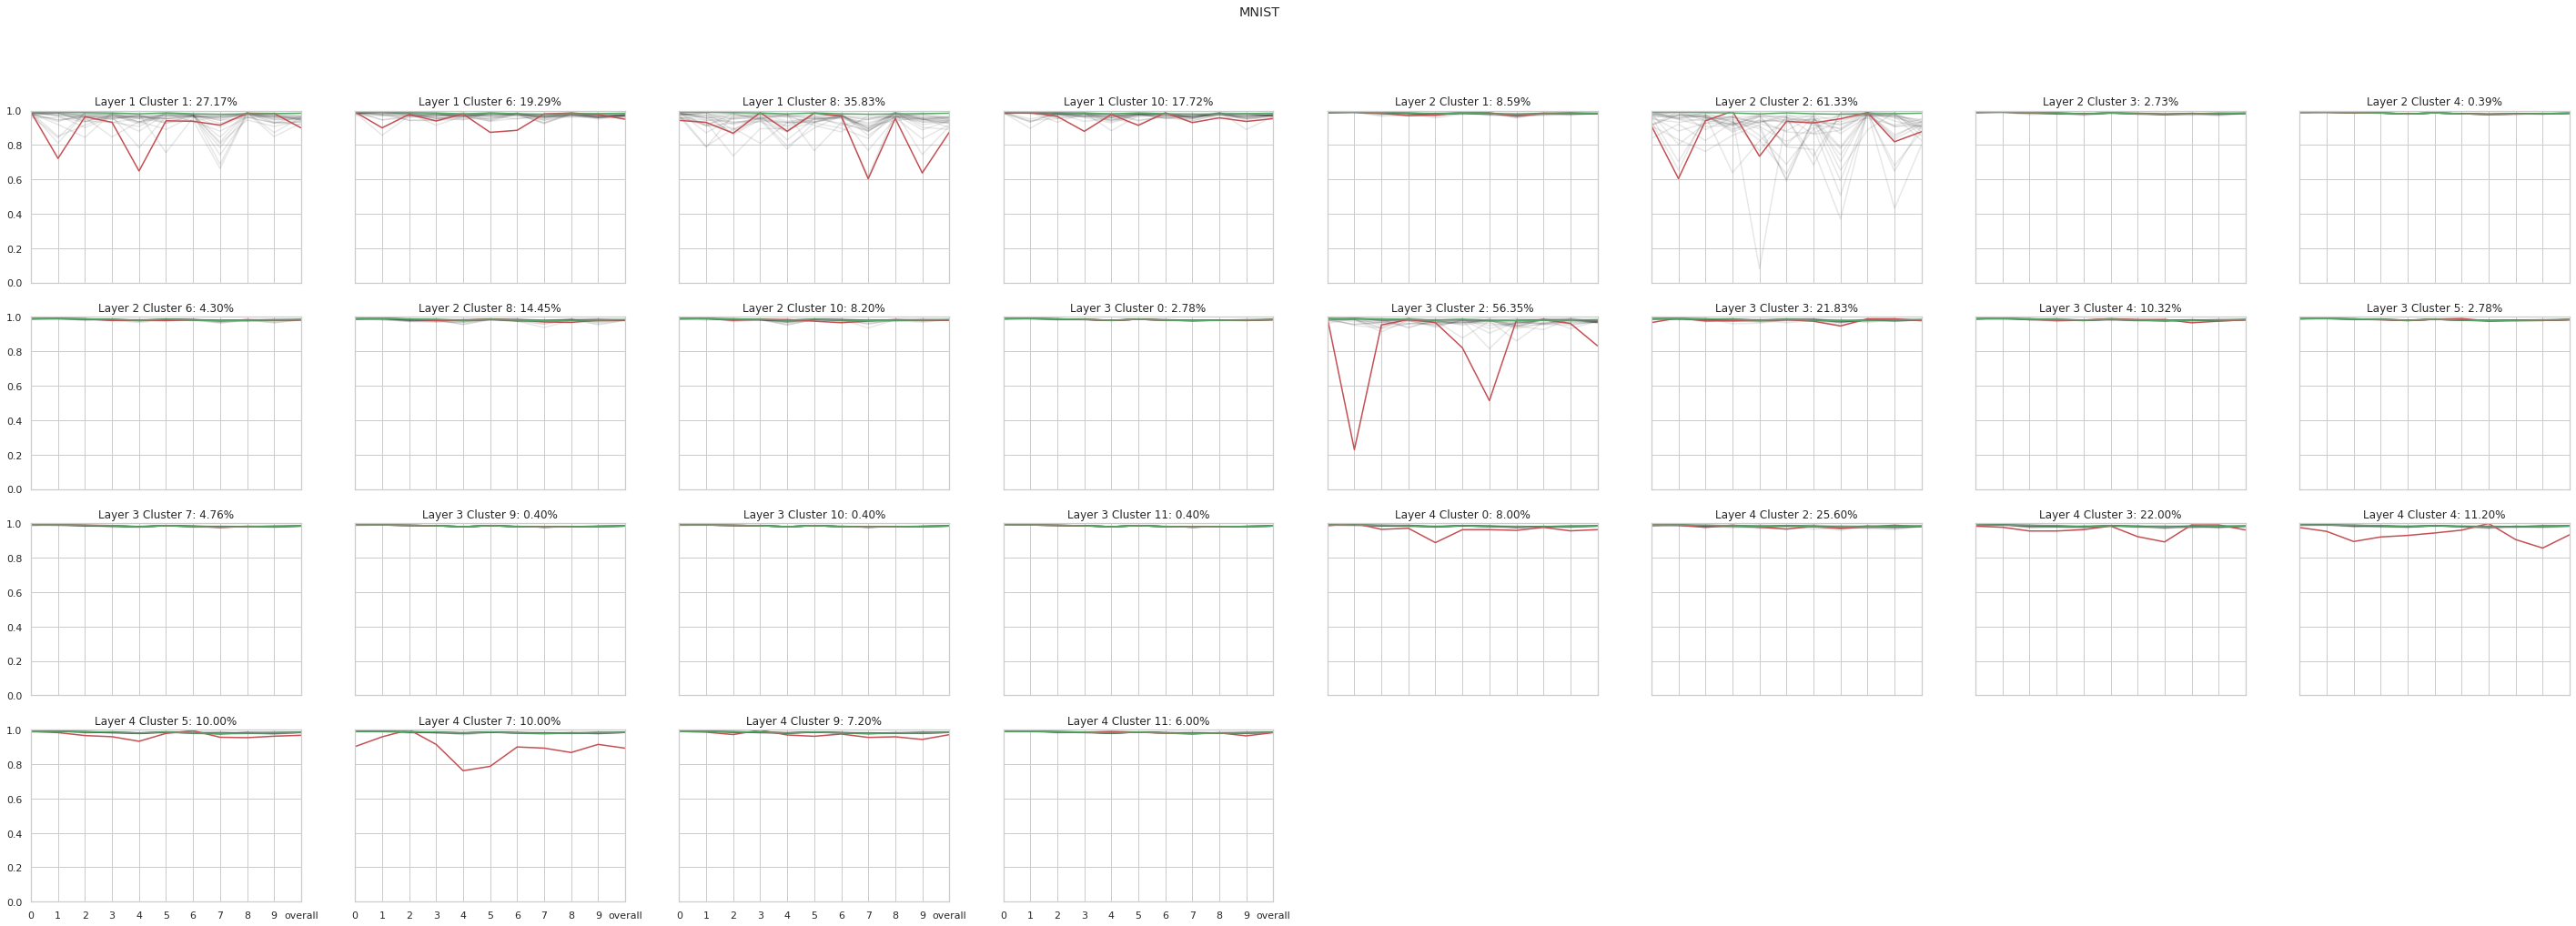

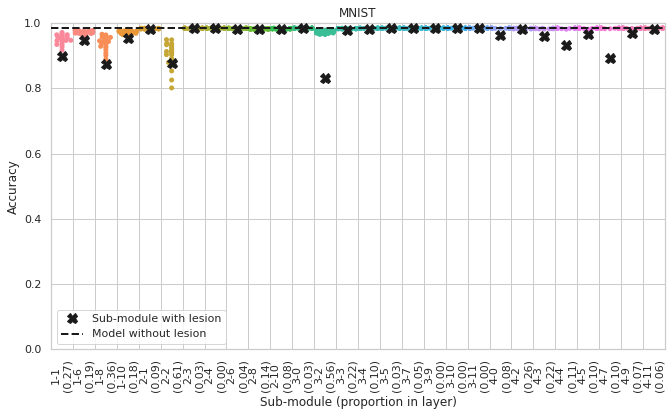

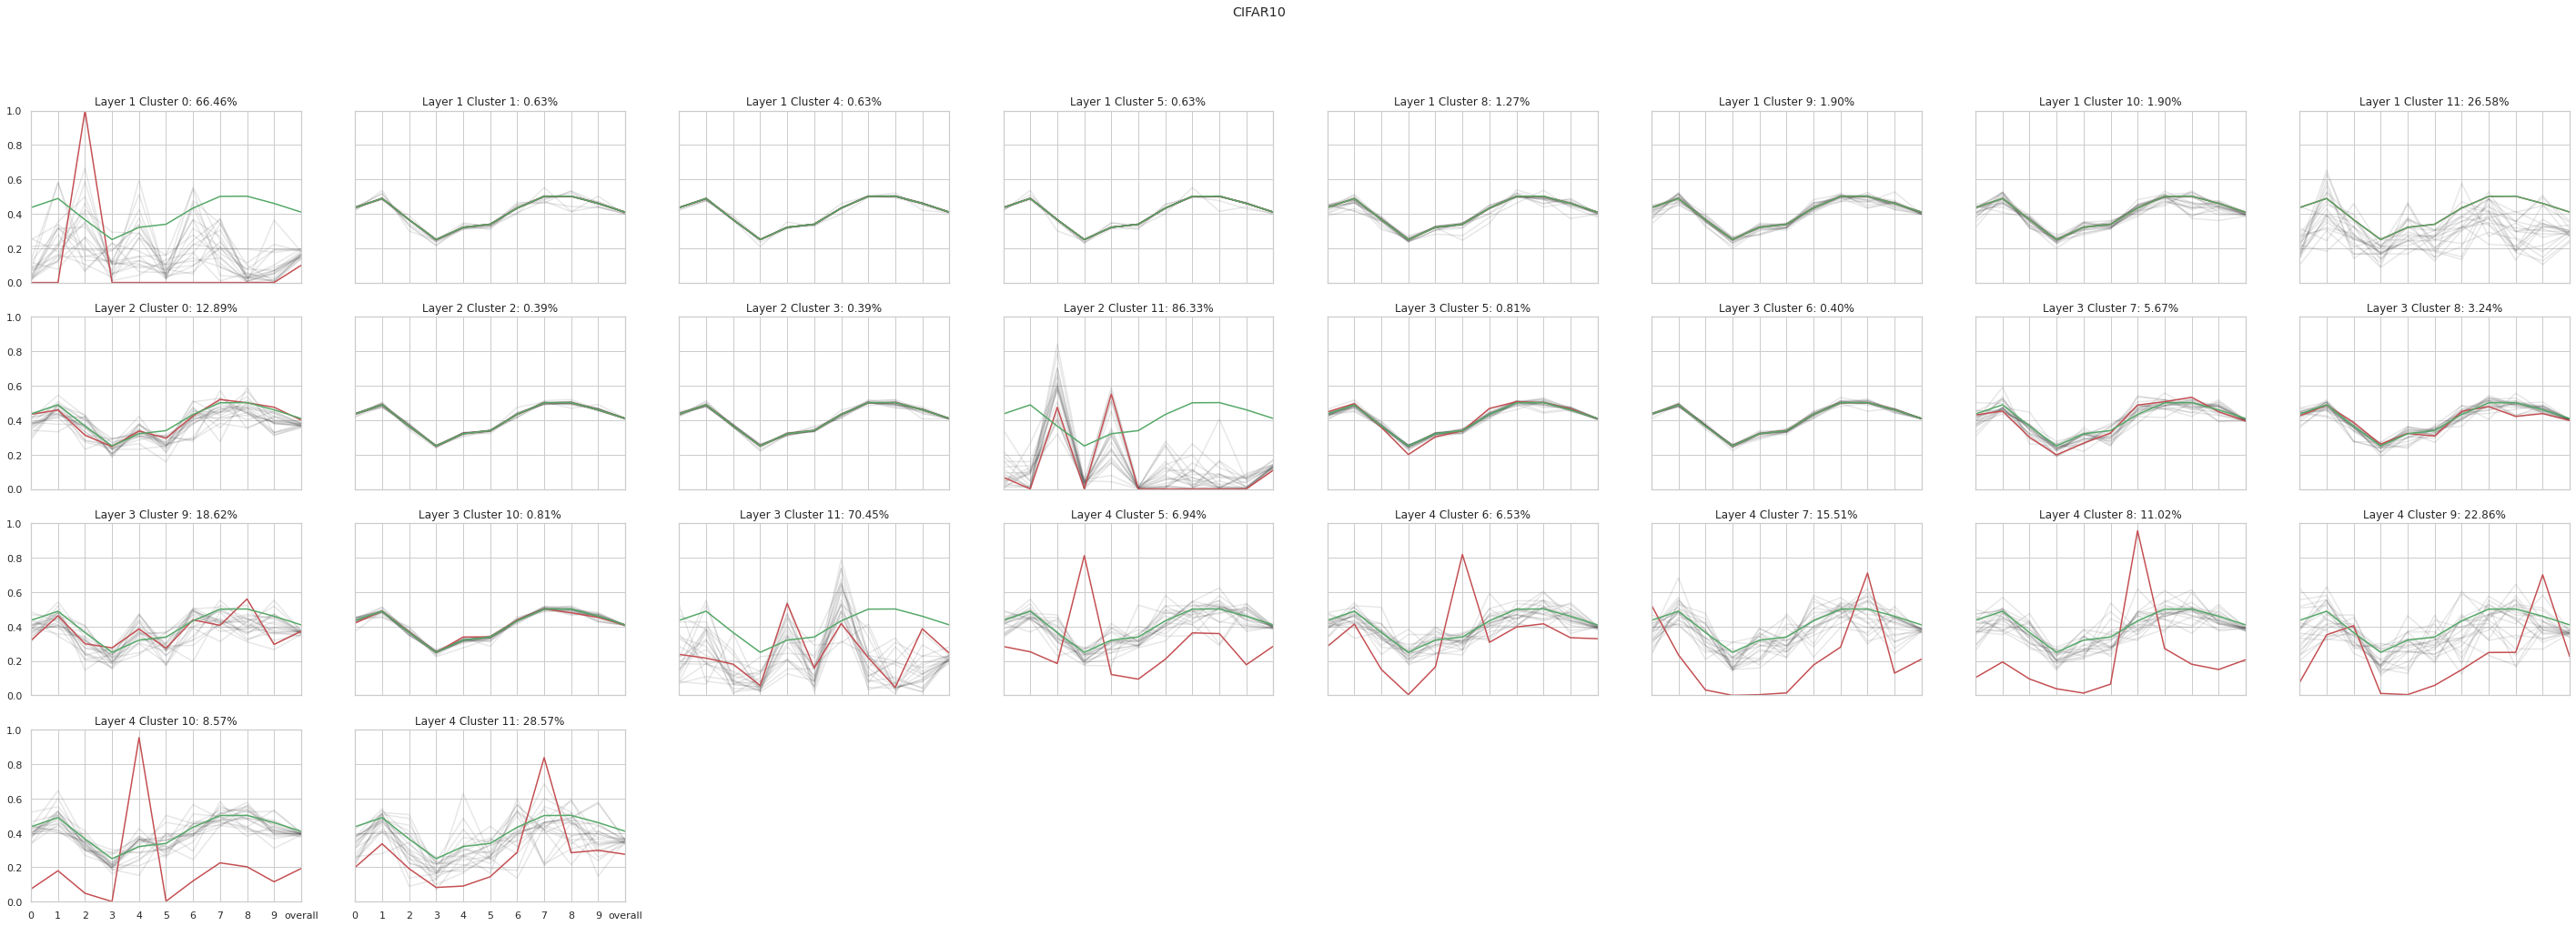

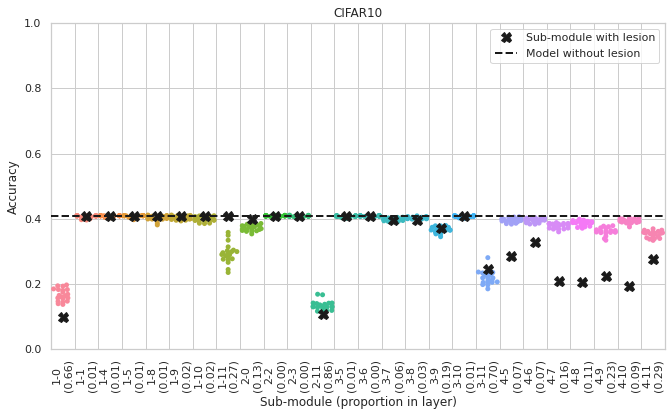

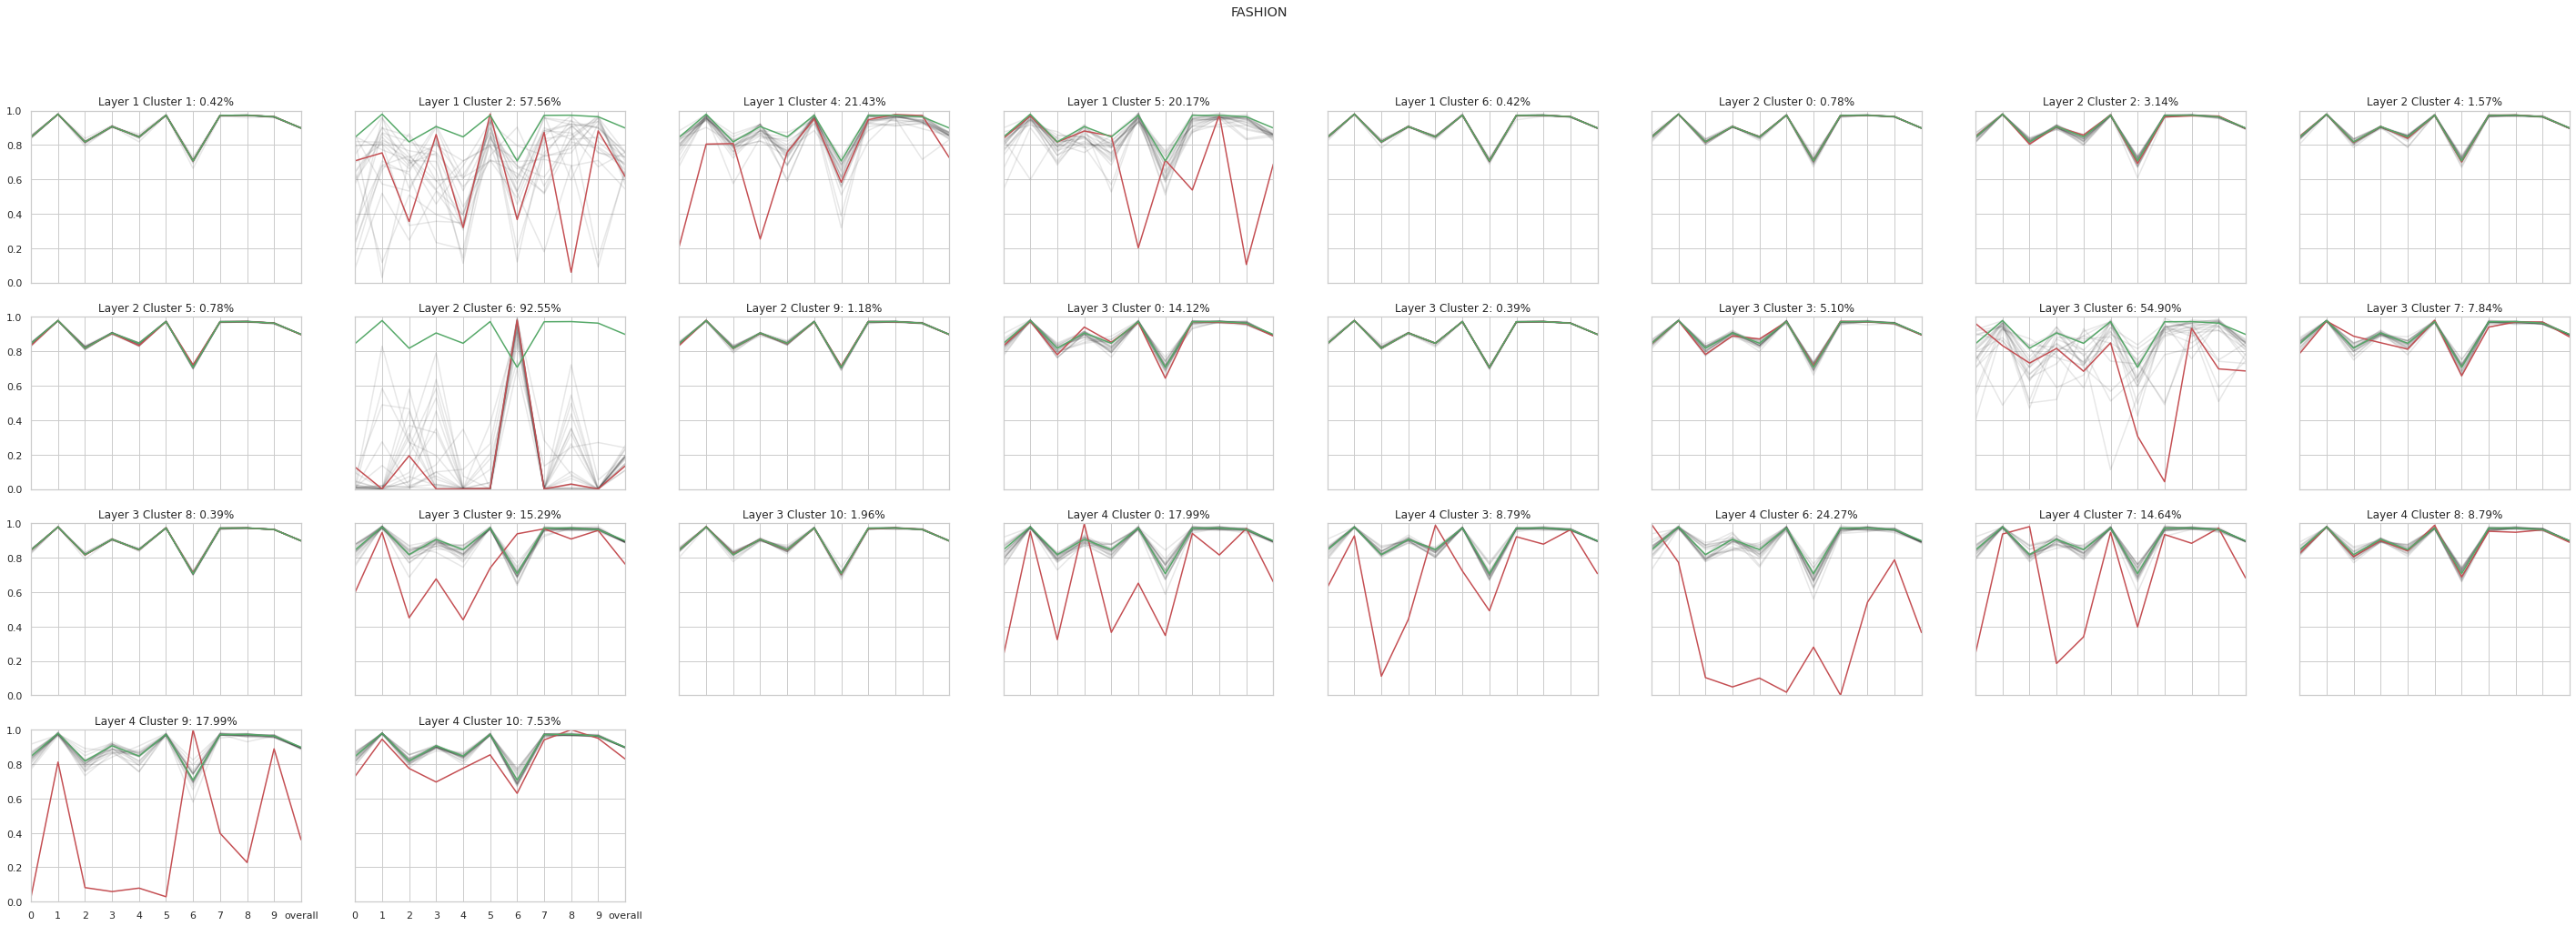

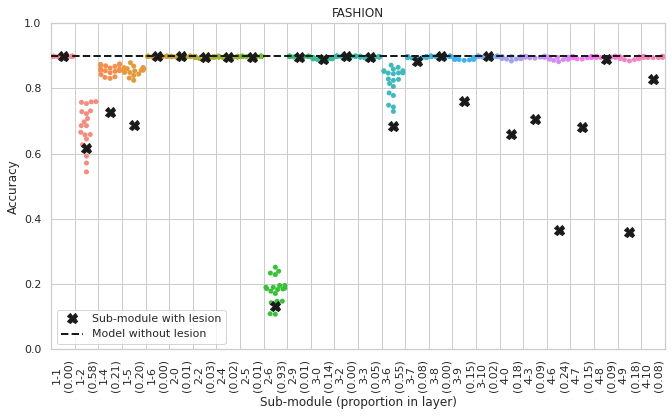

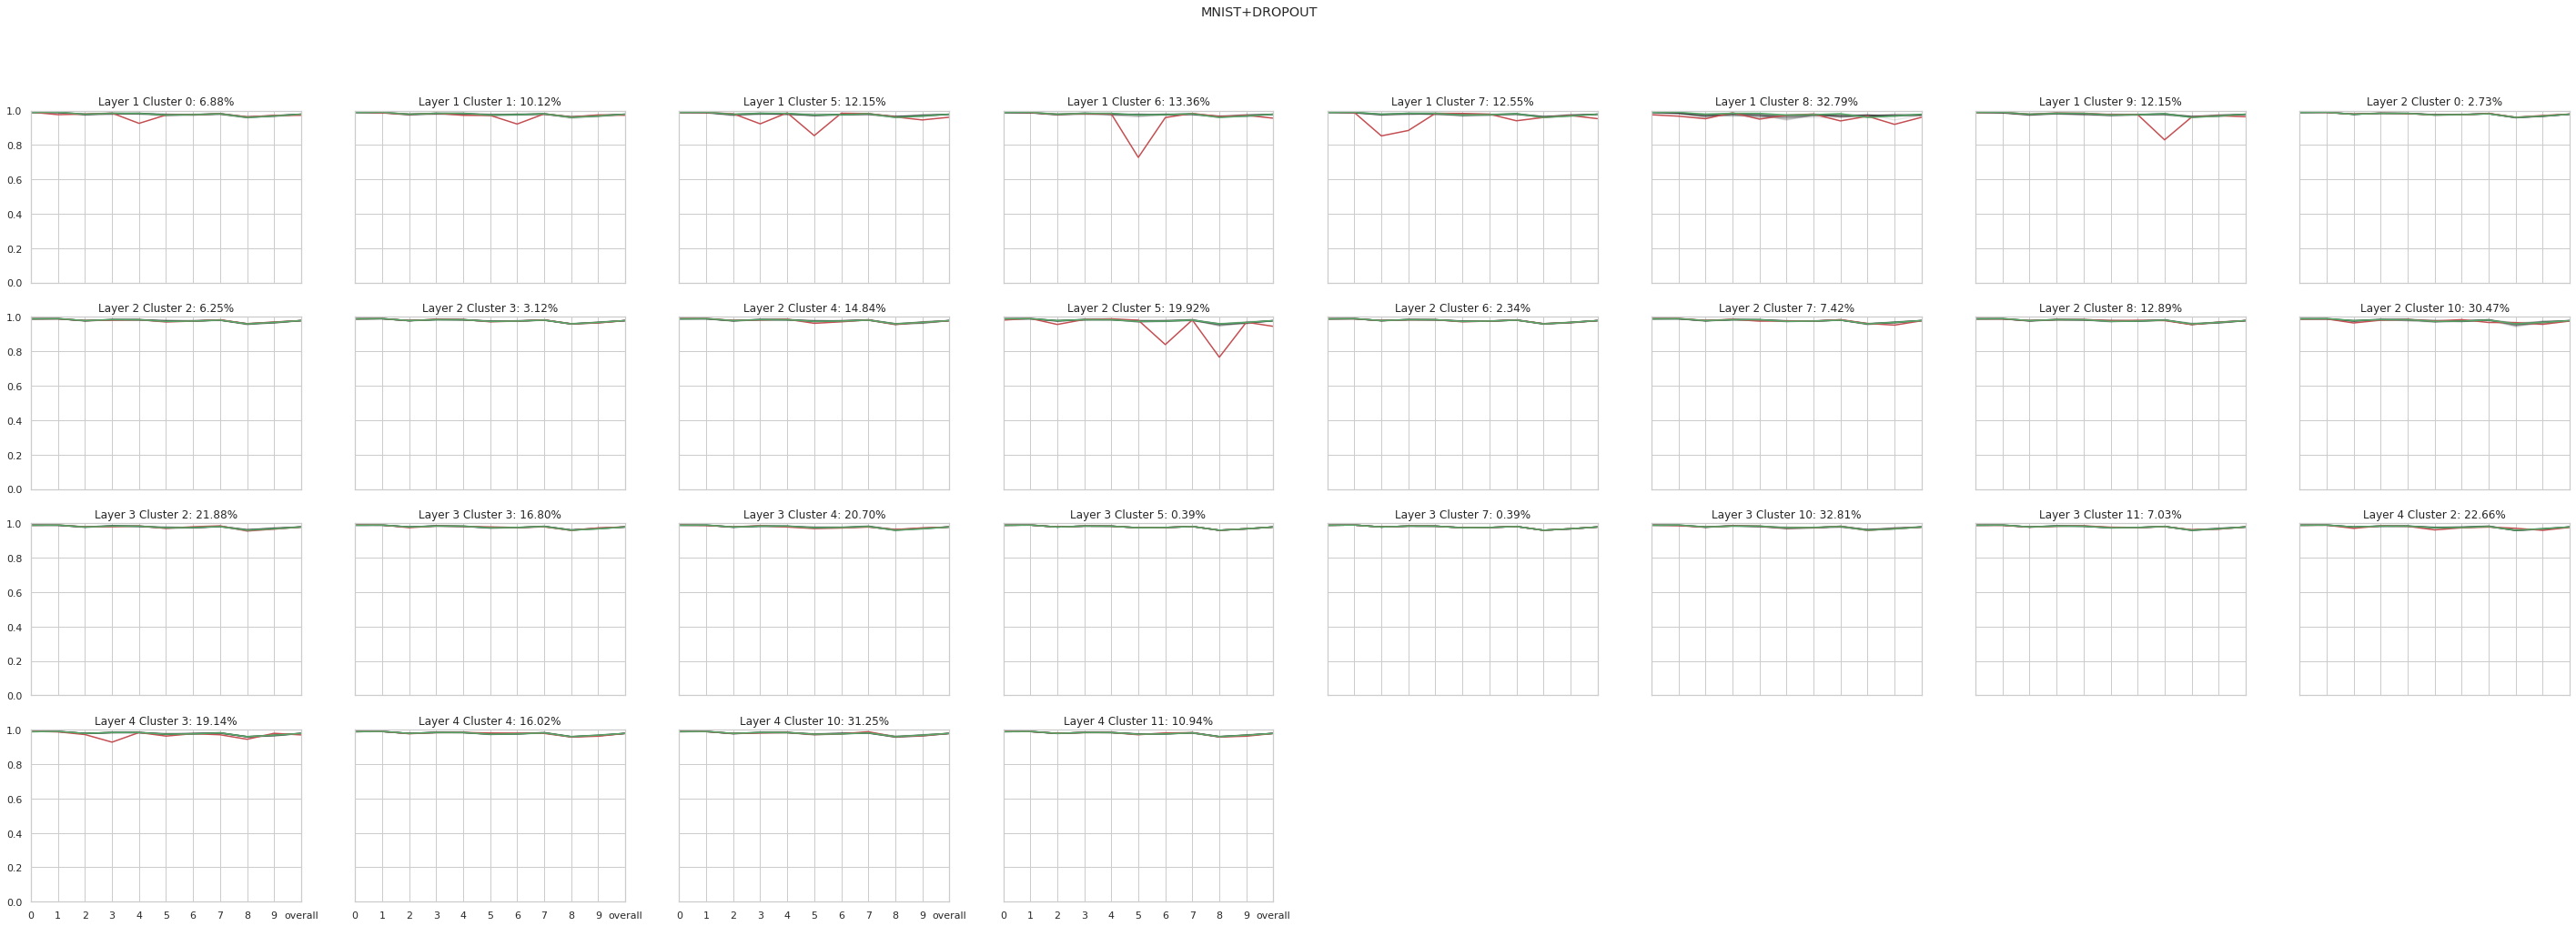

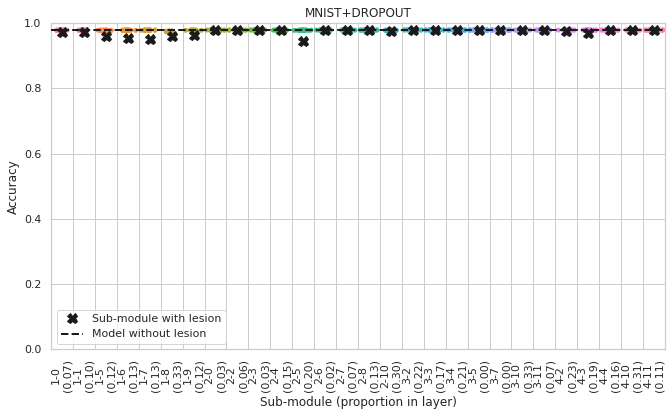

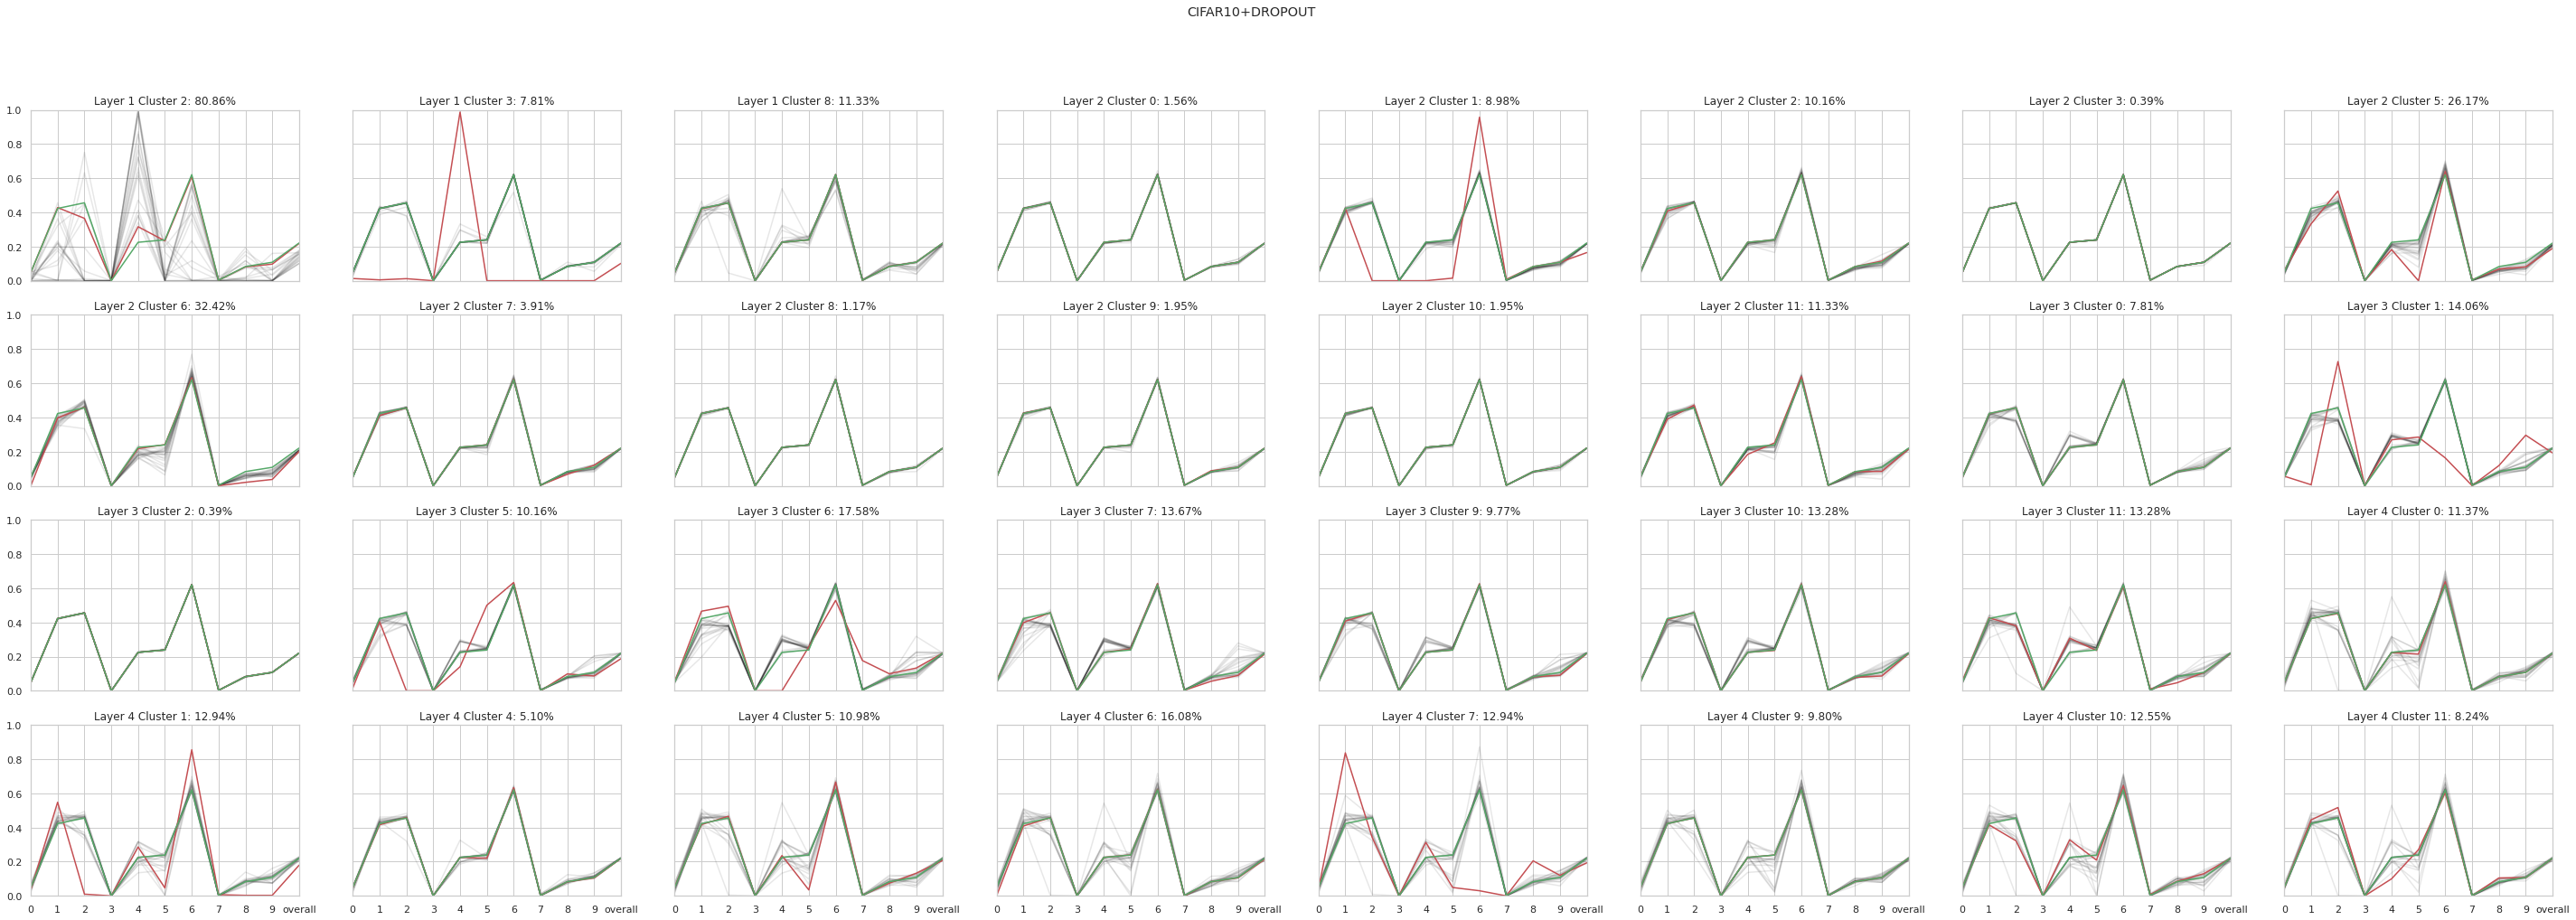

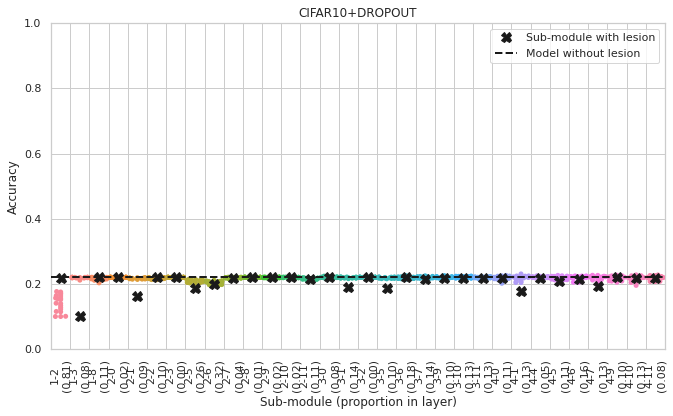

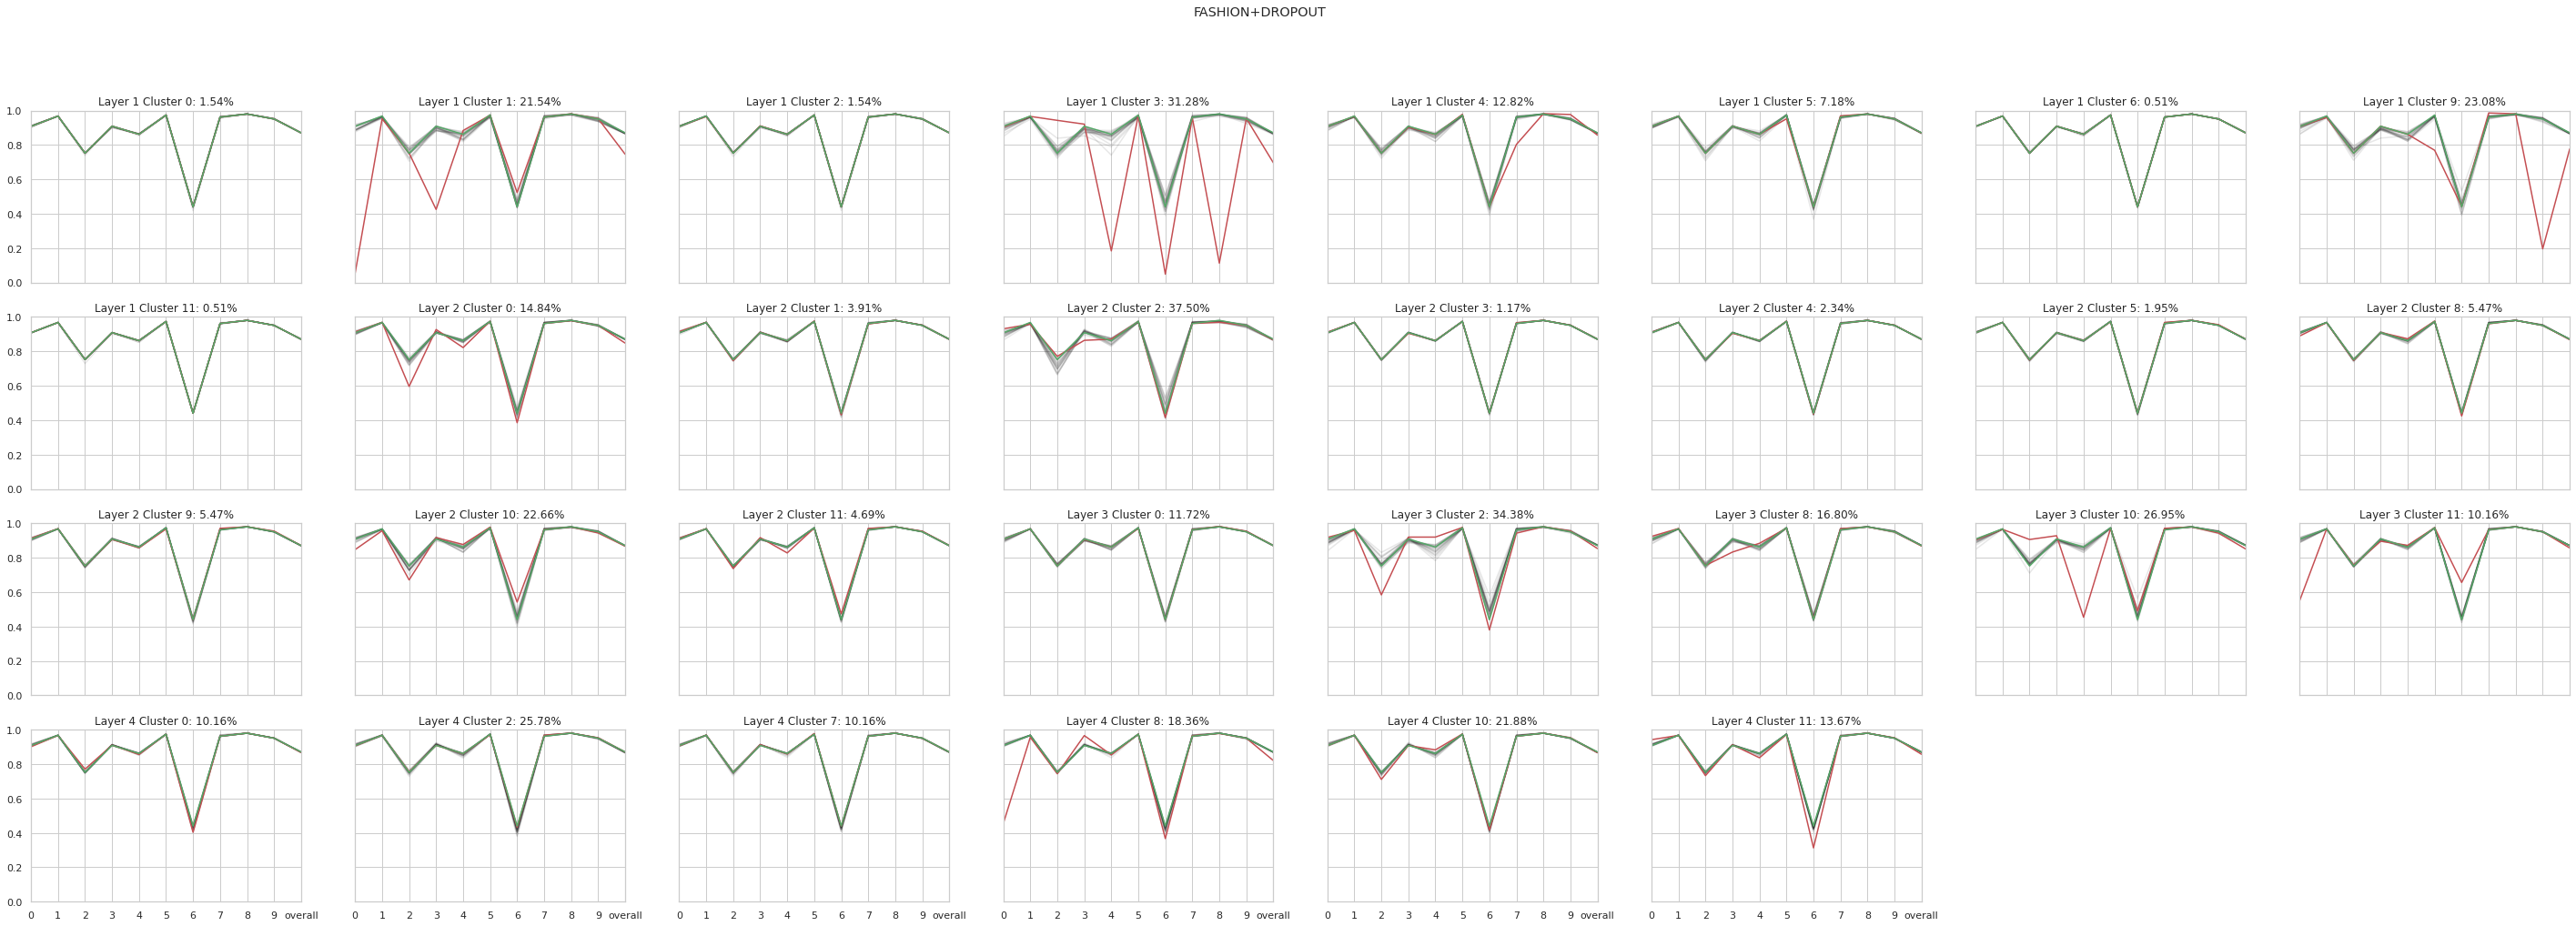

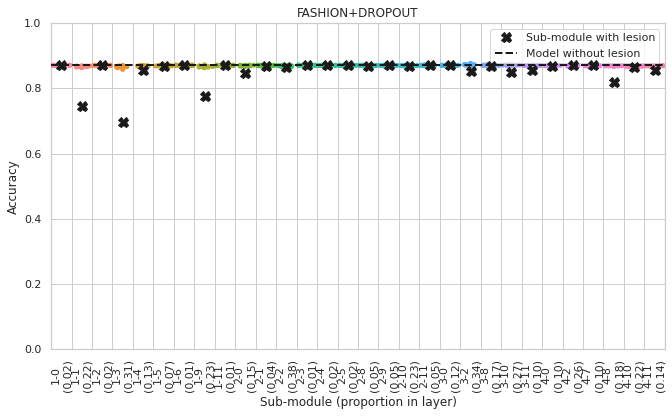

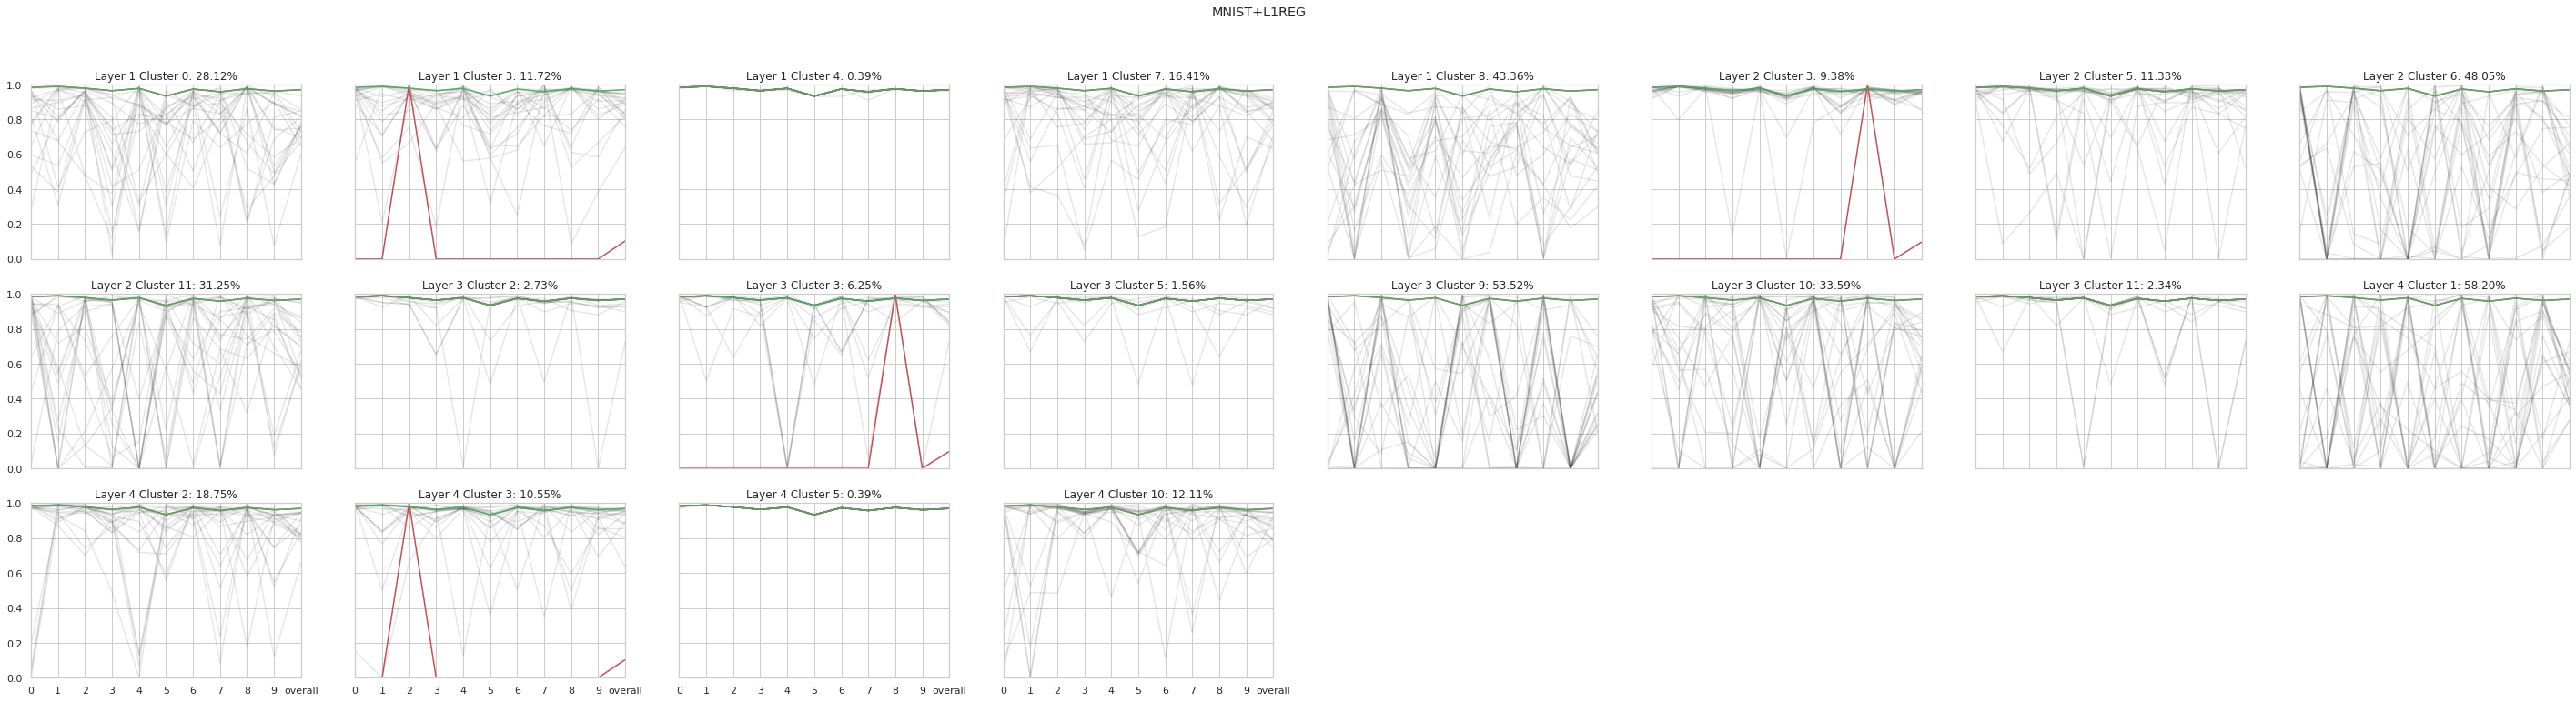

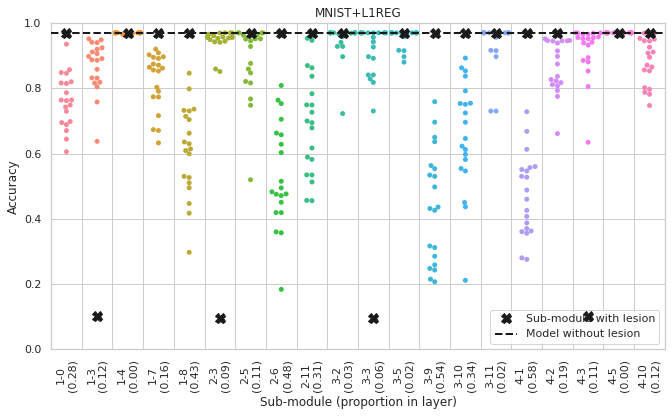

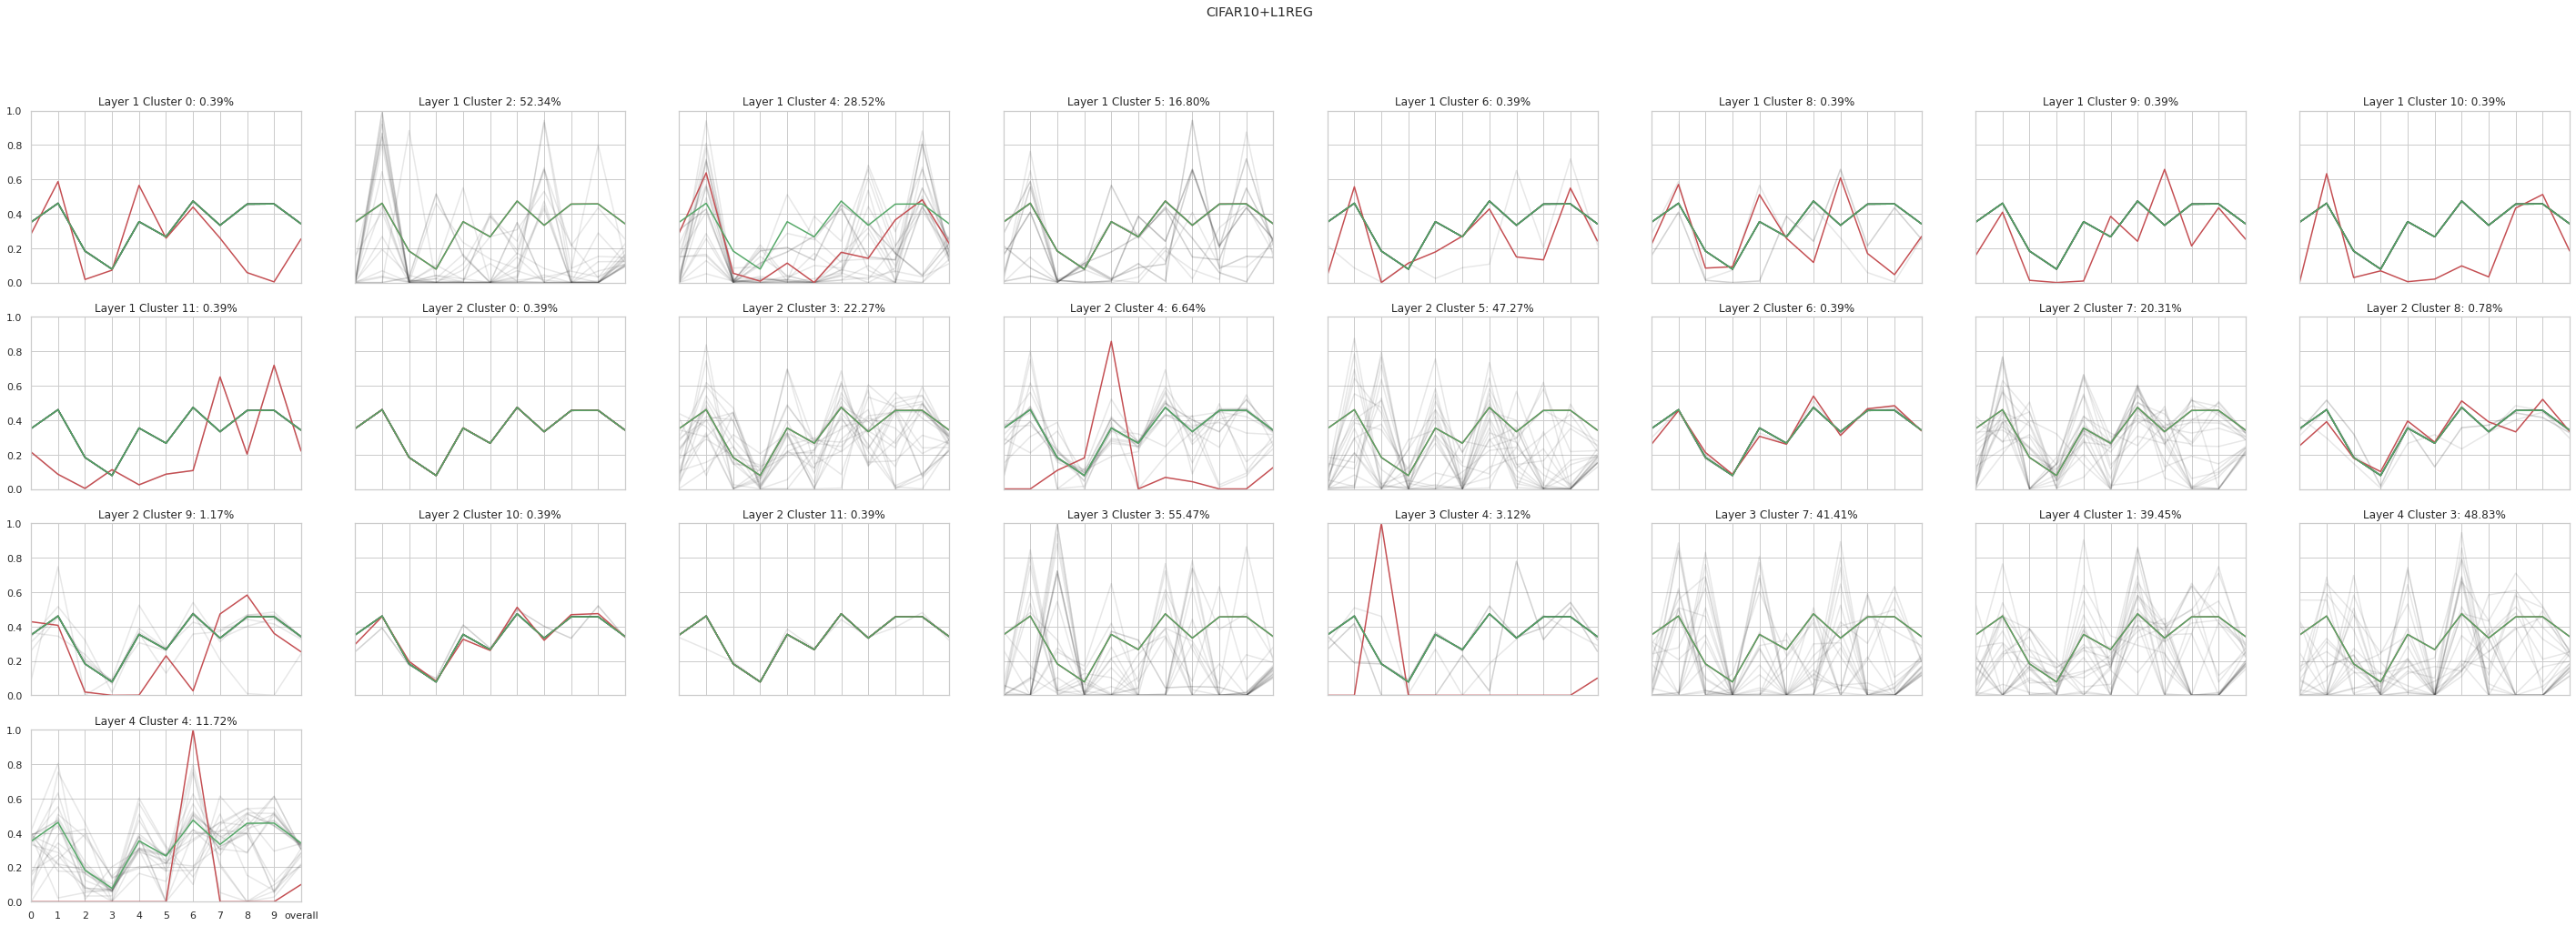

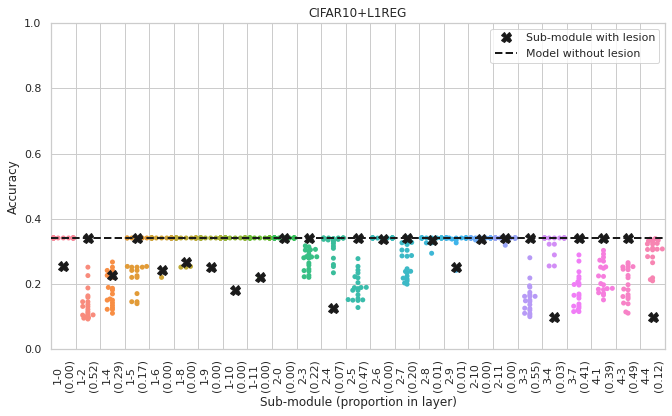

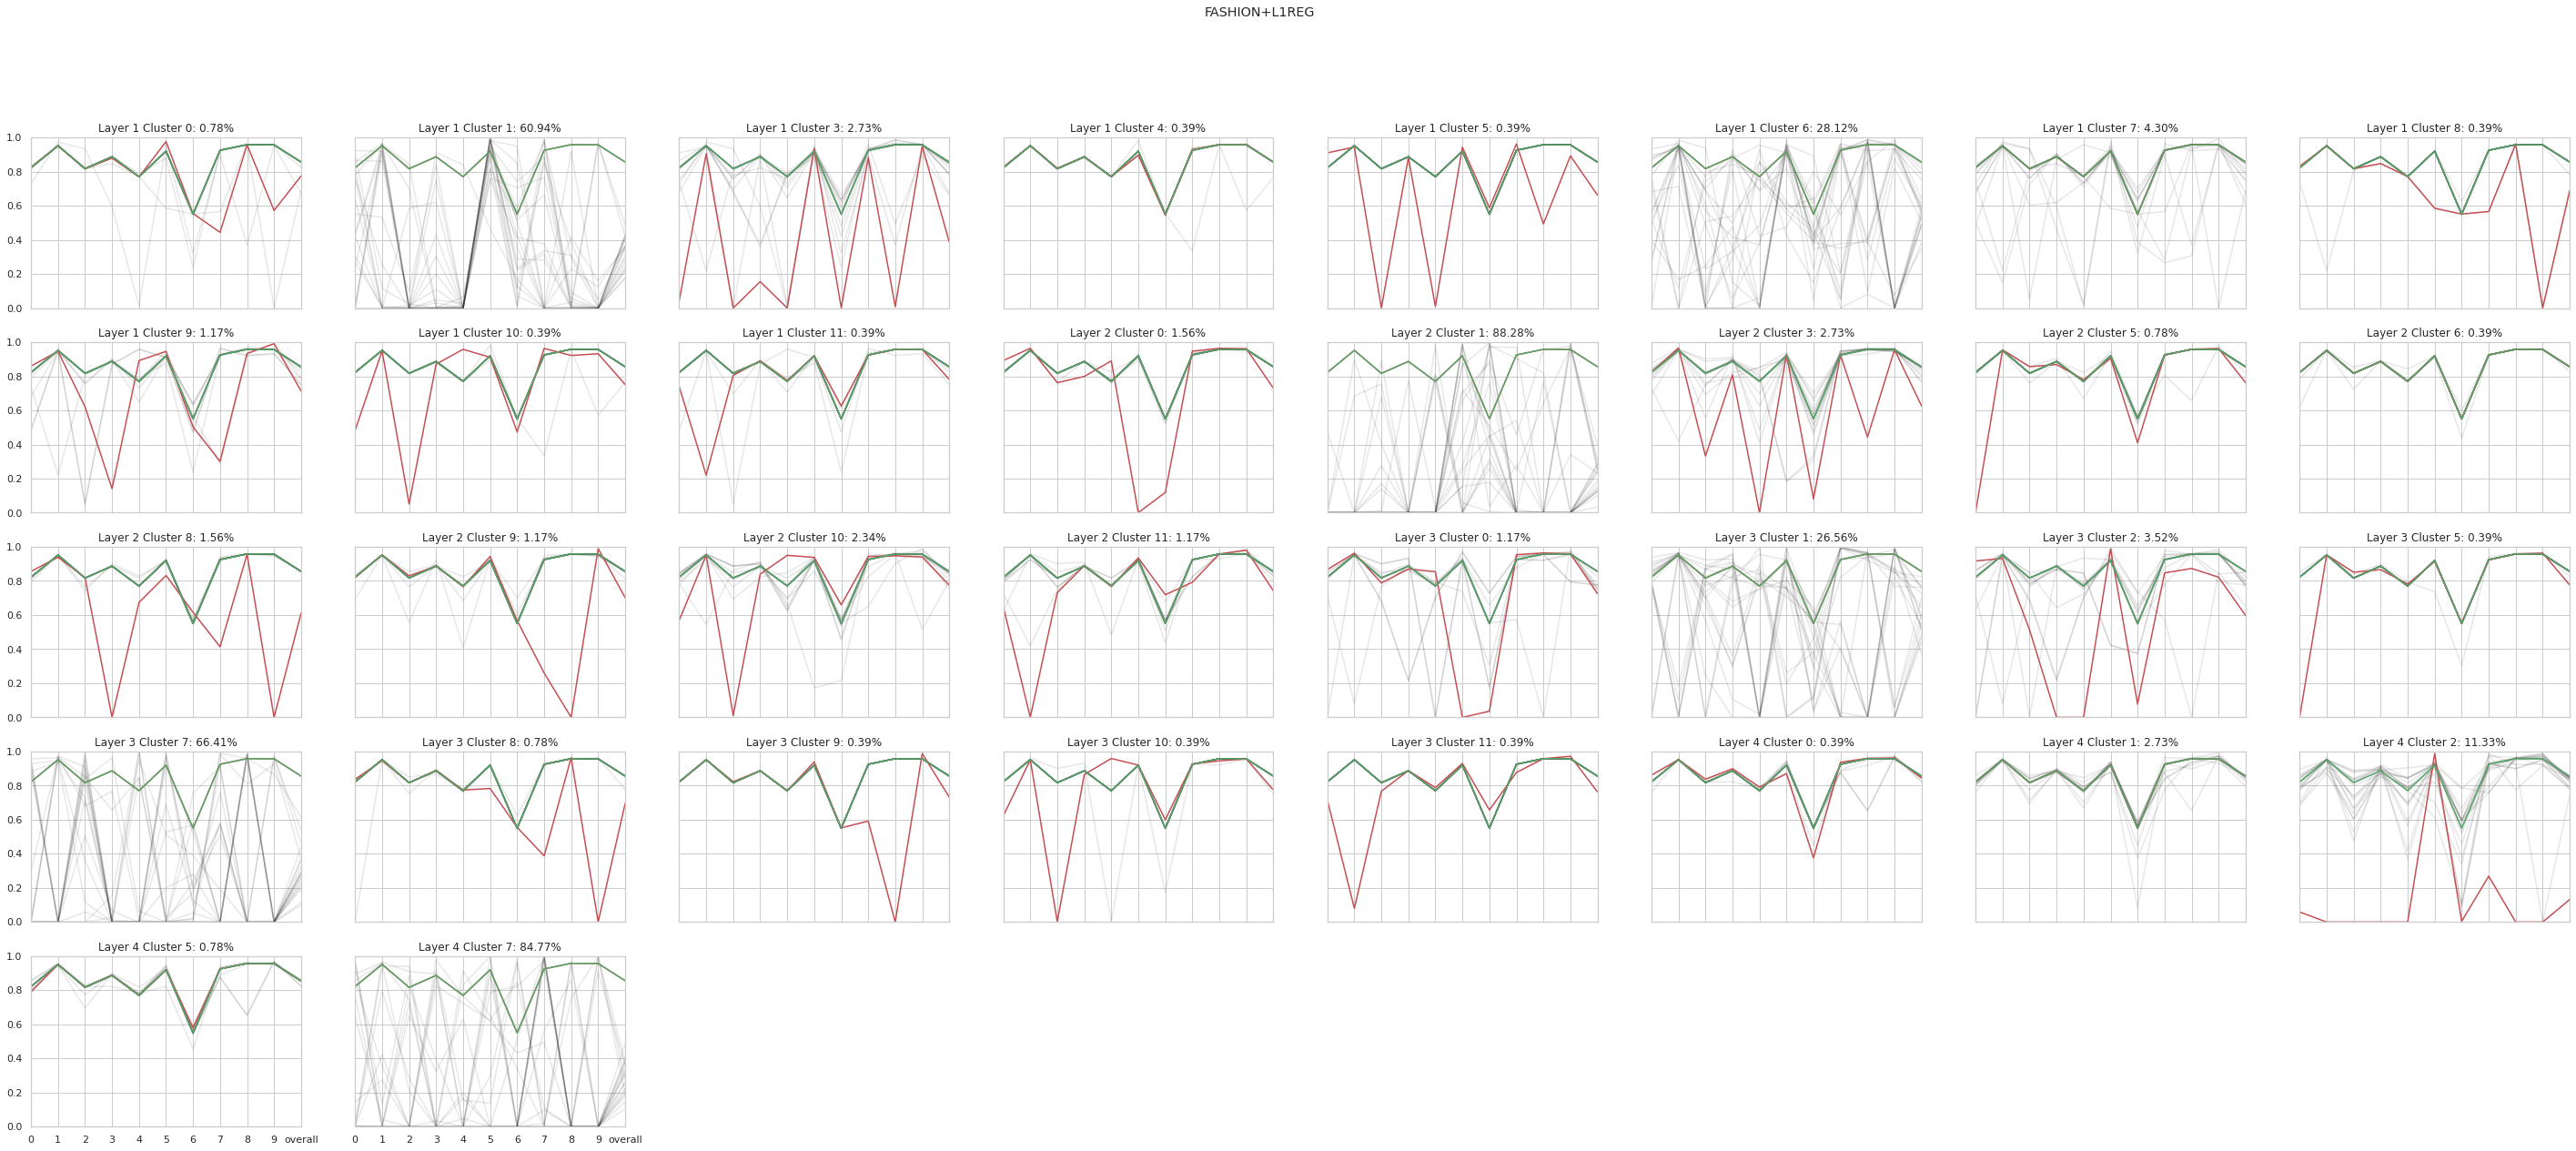

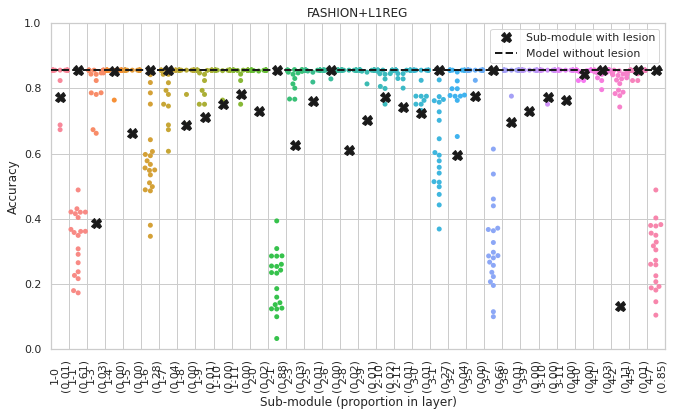

In [3]:
%%time

with warnings.catch_warnings():
    warnings.simplefilter('ignore')

    with pd.ExcelWriter('../results/mlp-lesion.xlsx') as writer:

        for dataset_name, model_name in tqdm(MODELS):

            (true_results,
             all_random_results,
             metadata,
             evaluation) = perform_lesion_experiment('.' + DATA_PATHS[dataset_name],
                                                           get_model_path(model_name),
                                                     n_clusters=n_clust, n_shuffles=n_shuffles)

            plot_all_damaged_clusters(true_results, all_random_results, metadata, evaluation,
                                      title=f'{model_name}')

            plot_overall_damaged_clusters(true_results, all_random_results, metadata, evaluation,
                                          title=f'{model_name}')

            # df = compute_damaged_cluster_stats(true_results, all_random_results, metadata, evaluation)
            # print(f'### {model_name}')
            # display.display(df)
            # df.to_csv(f'../results/mlp-lesion-{model_name}.csv')
            # df.to_excel(writer, sheet_name=model_name)

            hypo_results = do_lesion_hypo_tests(evaluation, true_results, all_random_results)
            mean_percentiles = hypo_results['mean_percentiles']
            range_percentiles = hypo_results['range_percentiles']
            chi2_p_means = hypo_results['chi2_p_means']
            chi2_p_ranges = hypo_results['chi2_p_ranges']
            combined_p_means = hypo_results['combined_p_means']
            combined_p_ranges = hypo_results['combined_p_ranges']
            print(f'{model_name}')
            print(f'Mean percentiles: {mean_percentiles}')
            print(f'Range percentiles: {range_percentiles}')
            print(f'chi2 mean p: {chi2_p_means}')
            print(f'chi2 range p: {chi2_p_means}')
            print(f'combined mean p: {combined_p_means}')
            print(f'combined range p: {combined_p_ranges}')
            print()

